In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
patients = pd.read_csv('heart_failure_clinical_records_dataset.train.csv')
#patients = pd.read_csv('heart_failure_clinical_records_dataset.train.csv', na_values=['', ' '])
#patients = appointments.replace(['', ' '], [np.nan, np.nan])

In [4]:
patients.shape

(239, 13)

Le dimensioni del dataset risultano essere esigue. Bisognerà stare attenti ad evitare che il modello non faccia overfitting, dovuto ad una complessità elevata del modello in condizioni di poche osservazioni disponibili. 

Potrebbe risultare un'alta accuracy dopo il training del modello, ma non necessariamente ciò sarà dovuto ad un'interpretazione adeguata dei dati. Un modo per mitigare questi rischi è l'utilizzo della Cross Validation, in modalità leave-one-out (k-fold con k=N numero di osservazioni del training set)

## Split del dataset in train.csv e test.csv, con salvataggio su disco

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_data, test_data = train_test_split(patients, train_size=0.8, test_size=0.2)

La decisione della percentuale di split train/test influisce in modo significativo sulla accuracy del modello. Si è scelto di non impostare valori estremi come 0.5 o 0.9 per la dimensione del training set.

Inoltre ogni volta che si cambiano le osservazioni che vengono salvate in train/test.csv rieseguendo il notebook cambiano le percentuali di accuracy nel training.

In [7]:
print(train_data.shape)
print(test_data.shape)

(191, 13)
(48, 13)


In [8]:
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

## Pulizia dati (dopo il train/test split)

In [9]:
patients = patients.apply(pd.to_numeric, errors = 'coerce')
patients = patients.fillna(patients.mean().round())

## Data Exploration

In [10]:
patients.shape

(239, 13)

In [11]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEATH_EVENT               239 non-null    int64  
 1   age                       239 non-null    float64
 2   anaemia                   239 non-null    float64
 3   creatinine_phosphokinase  239 non-null    float64
 4   diabetes                  239 non-null    float64
 5   ejection_fraction         239 non-null    float64
 6   high_blood_pressure       239 non-null    float64
 7   platelets                 239 non-null    float64
 8   serum_creatinine          239 non-null    float64
 9   serum_sodium              239 non-null    int64  
 10  sex                       239 non-null    float64
 11  smoking                   239 non-null    float64
 12  time                      239 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 24.4 KB


Alcune di queste feature possono essere scalate per normalizzarle in valori interi in range più piccoli (ad esempio platelets e serum_creatinine)

In [12]:
patients.describe()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.00000,239.000000,239.000000,239.000000,239.000000
mean,0.297071,60.963741,0.430962,581.008368,0.405858,38.297071,0.351464,262542.692887,1.38569,136.418410,0.644351,0.313808,131.686192
std,0.457927,11.950512,0.496250,945.955188,0.492088,11.638806,0.478430,94255.659629,0.99529,4.440152,0.479714,0.465013,77.777140
min,0.000000,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.50000,113.000000,0.000000,0.000000,4.000000
25%,0.000000,52.000000,0.000000,112.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.000000,73.500000
50%,0.000000,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263000.000000,1.10000,137.000000,1.000000,0.000000,119.000000
75%,1.000000,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,139.000000,1.000000,1.000000,205.000000
max,1.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,742000.000000,9.00000,146.000000,1.000000,1.000000,285.000000


In [13]:
patients.nunique()

DEATH_EVENT                   2
age                          47
anaemia                       2
creatinine_phosphokinase    176
diabetes                      2
ejection_fraction            16
high_blood_pressure           2
platelets                   154
serum_creatinine             38
serum_sodium                 26
sex                           2
smoking                       2
time                        132
dtype: int64

In [14]:
patients.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,75.000,1.0,246.0,0.0,15.0,0.0,127000.00,1.20,137,1.0,0.0,10.0
1,1,61.000,0.0,99.0,0.0,38.0,1.0,224000.00,2.50,134,1.0,0.0,162.0
2,1,60.667,1.0,104.0,1.0,30.0,0.0,389000.00,1.50,136,1.0,0.0,171.0
3,0,52.000,0.0,132.0,0.0,30.0,0.0,218000.00,0.70,136,1.0,1.0,112.0
4,1,94.000,0.0,582.0,1.0,38.0,1.0,263358.03,1.83,134,1.0,0.0,27.0


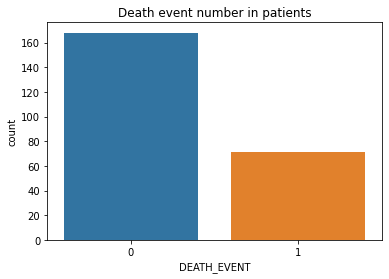

In [15]:
ax = sns.countplot(x='DEATH_EVENT', data=patients).set_title('Death event number in patients')

Il numero di osservazioni per ogni possibile valore dell'evento morte è molto sbilanciato. In un dataset con molte osservazioni potrebbe essere opportuno bilanciarlo eliminando le osservazioni della classe più numerosa. 

In questo caso il dataset è piccolo, ed esistono tecniche (come lo SMOTE) per popolare la classe meno numerosa generando sinteticamente delle osservazioni. Tuttavia questi metodi non sono stati visti a lezione e non verranno usati.

## Analisi delle feature

### Correlazione delle feature

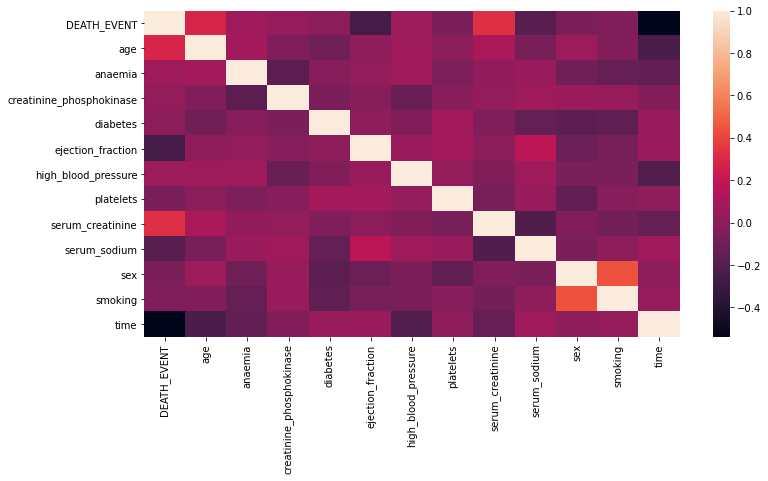

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(patients.corr(), annot=False)
#plt.xticks(rotation=45)
plt.show()

### Age

All'aumentare dell'età del paziente aumenta la probabilità che possa morire (e ciò è veritiero). Potrebbe essere conveniente dividere le età in dei bin.

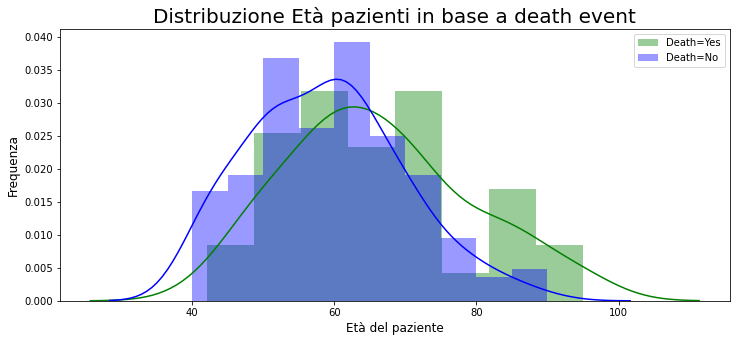

In [17]:
fig = plt.figure(figsize=(12,5))
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 1),'age'] , color='g', label='Death=Yes')
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 0),'age'] , color='b', label='Death=No')
plt.title('Distribuzione Età pazienti in base a death event', fontsize = 20)
plt.legend()
plt.xlabel("Età del paziente", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

### Anaemia, Diabetes, High Blood Pressure, Sex, Smoking

Il numero di osservazioni per i valori di ogni feature sono relativamente bilanciati, non mostrano troppi pochi valori nel caso di morte del paziente o meno.

Per quanto riguarda la probabilità di morte di un paziente relativamente alle feature considerate:
    - Anemia (Diminuzione dei globuli rossi nel sangue): Aumento della probabilità di morte
    - Diabete (Alto valore glucosio nel sangue): Non cambia la probabilità
    - Pressione Sanguigna Alta (Ipertensione) : Aumenta la probabilità di morte
    - Sesso (Maschio/Femmina): Uno dei due sessi è più a rischio (gli uomini se 0=Maschio)
    - Fumatore: Controintuitivamente chi è fumatore è meno a rischio rispetto agli altri pazienti (in questo dataset che è piccolo, non è un'informazione affidabile)
    
Ciò che si potrebbe affermare in generale, a prescindere da queste probabilità che possono essere non veritiere date le poche osservazioni, è che tutte le patologie o gli stili di vita non salutari influsicono sulla probabilità di malattia cardiovascolare. 

Alcune informazioni sono presenti sul sito della WHO (cercando "cardiovascular"): https://www.who.int/healthinfo/global_burden_disease/GlobalHealthRisks_report_full.pdf?ua

Si potrebbe considerare una nuova feature che consideri la presenza di uno o più di questi fattori di rischio, sommando i valori booleani, ed eliminando le feature booleane usate per questo calcolo (non si considera sex)

In [18]:
boolean_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

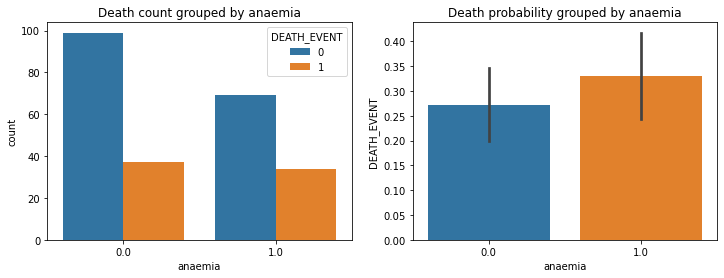

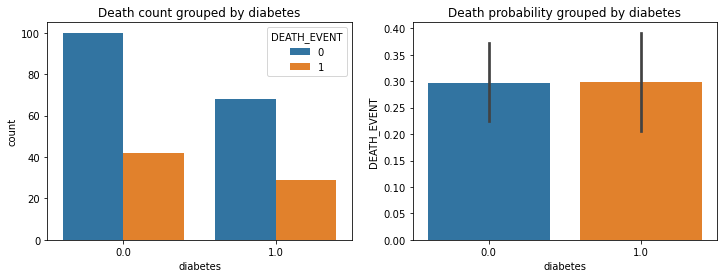

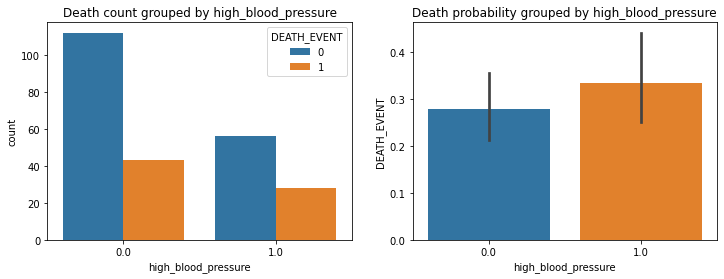

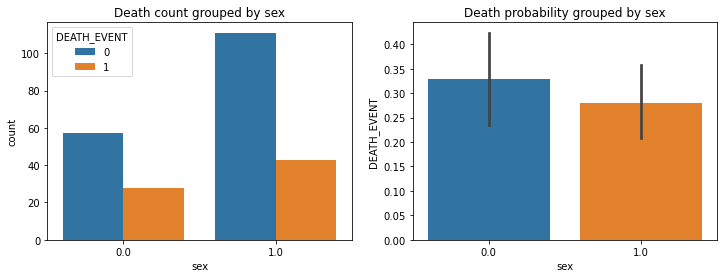

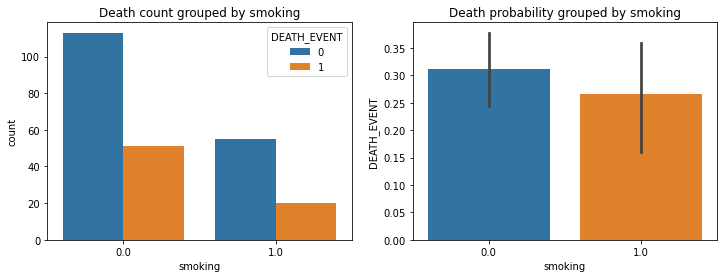

In [19]:
for feature in boolean_features:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.countplot(x=feature, hue='DEATH_EVENT', data=patients, ax=ax[0]).set_title('Death count grouped by ' + feature)
    patients[[feature, 'DEATH_EVENT']].groupby([feature]).count().sort_values(by='DEATH_EVENT', ascending=False)
    
    sns.barplot(x=feature, y='DEATH_EVENT', data=patients, ax=ax[1]).set_title('Death probability grouped by ' + feature)
    patients[[feature, 'DEATH_EVENT']].groupby([feature]).mean().sort_values(by='DEATH_EVENT', ascending=False)

In [20]:
patients[['DEATH_EVENT', 'smoking']].groupby(['smoking']).count()

,DEATH_EVENT
smoking,
0.0,164
1.0,75


In [21]:
boolean_features.remove('sex')

In [22]:
patients[boolean_features].head()

,anaemia,diabetes,high_blood_pressure,smoking
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0


In [23]:
patients['risk_factor'] = patients[boolean_features].sum(axis=1)
patients['risk_factor'].value_counts()

1.0    99
2.0    81
3.0    30
0.0    27
4.0     2
Name: risk_factor, dtype: int64

Valori crescenti di risk_factor corrispondono a un crescente rischio di malattie cardiovascolari (in teoria i pochi dati non aiutano, infatti per risk_factor=0 c'è più varianza)

,DEATH_EVENT
risk_factor,
3.0,0.400000
0.0,0.333333
2.0,0.308642
1.0,0.252525
4.0,0.000000


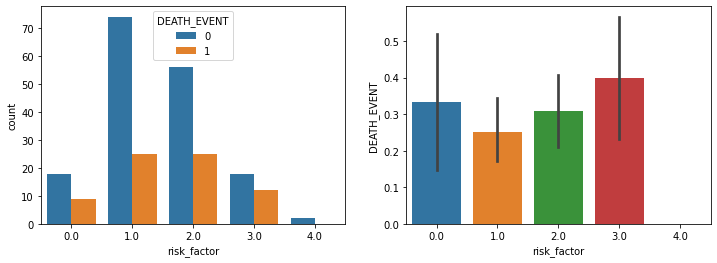

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='risk_factor', hue='DEATH_EVENT', data=patients, ax=ax[0])
patients[['risk_factor', 'DEATH_EVENT']].groupby(['risk_factor']).count().sort_values(by='DEATH_EVENT', ascending=False)

sns.barplot(x='risk_factor', y='DEATH_EVENT', data=patients, ax=ax[1])
patients[['risk_factor', 'DEATH_EVENT']].groupby(['risk_factor']).mean().sort_values(by='DEATH_EVENT', ascending=False)

### Creatinine Phosphokinase 
#### Livello di enzima CPK nel sangue (mcg/L)

Incide sulla mortalità per valori più elevati, e per valori più comuni non sembra essere decisivo

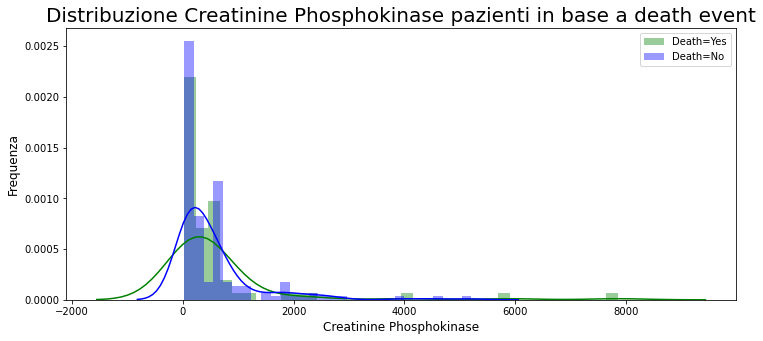

In [25]:
fig = plt.figure(figsize=(12,5))
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 1),'creatinine_phosphokinase'] , color='g', label='Death=Yes')
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 0),'creatinine_phosphokinase'] , color='b', label='Death=No')
plt.title('Distribuzione Creatinine Phosphokinase pazienti in base a death event', fontsize = 20)
plt.legend()
plt.xlabel("Creatinine Phosphokinase", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

### Ejection Fraction
#### Percentuale di sangue che esce dal cuore ad ogni contrazione (%)

Valori bassi sono correlati significativamente al tasso di mortalità

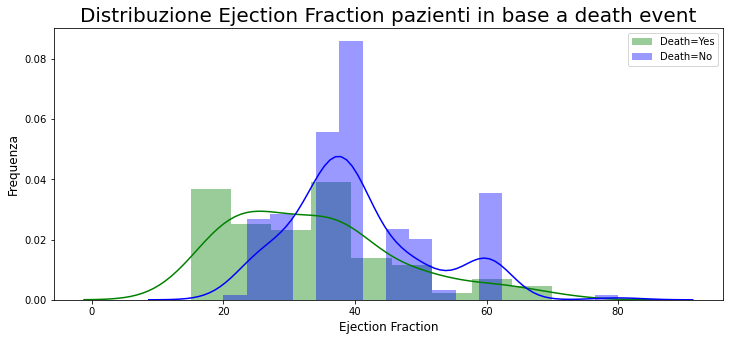

In [26]:
fig = plt.figure(figsize=(12,5))
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 1),'ejection_fraction'] , color='g', label='Death=Yes')
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 0),'ejection_fraction'] , color='b', label='Death=No')
plt.title('Distribuzione Ejection Fraction pazienti in base a death event', fontsize = 20)
plt.legend()
plt.xlabel("Ejection Fraction", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

### Platelets
#### Piastrine nel sangue (kiloplatelets/mL)

Le due curve sono quasi equivalenti (stessa centratura), tranne per il valore sigma delle gaussiane che rende la mortalità leggermente maggiore agli estremi (più per valori bassi)

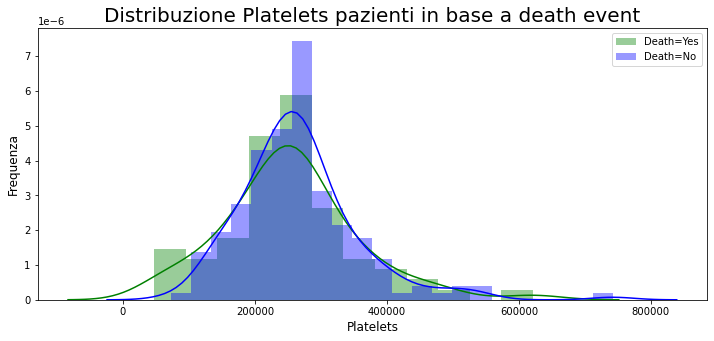

In [27]:
fig = plt.figure(figsize=(12,5))
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 1),'platelets'] , color='g', label='Death=Yes')
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 0),'platelets'] , color='b', label='Death=No')
plt.title('Distribuzione Platelets pazienti in base a death event', fontsize = 20)
plt.legend()
plt.xlabel("Platelets", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

Scaling della feature per avere valori interi più contenuti

In [28]:
patients.platelets = patients.platelets / 10**3

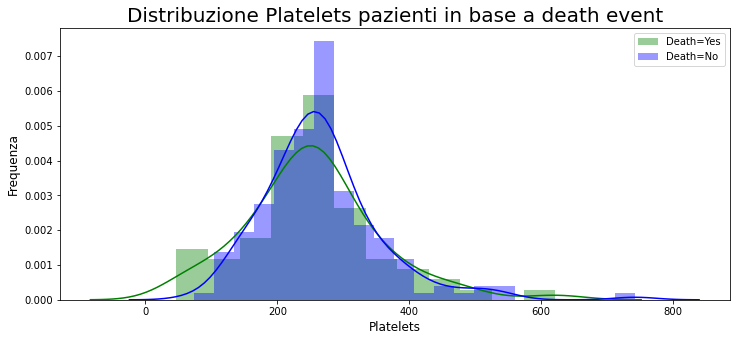

In [29]:
fig = plt.figure(figsize=(12,5))
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 1),'platelets'] , color='g', label='Death=Yes')
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 0),'platelets'] , color='b', label='Death=No')
plt.title('Distribuzione Platelets pazienti in base a death event', fontsize = 20)
plt.legend()
plt.xlabel("Platelets", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

### Serum Creatinine 
#### Livello di creatinina nel sangue (mg/dL)

Feature significativa, dato che all'aumentare del suo valore la probabilità di morte aumenta significativamente

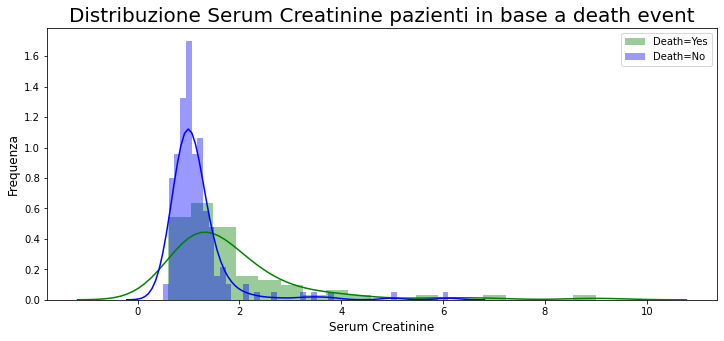

In [30]:
fig = plt.figure(figsize=(12,5))
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 1),'serum_creatinine'] , color='g', label='Death=Yes')
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 0),'serum_creatinine'] , color='b', label='Death=No')
plt.title('Distribuzione Serum Creatinine pazienti in base a death event', fontsize = 20)
plt.legend()
plt.xlabel("Serum Creatinine", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

Scaling della feature per avere range interi

In [31]:
patients.serum_creatinine = patients.serum_creatinine * 10**2

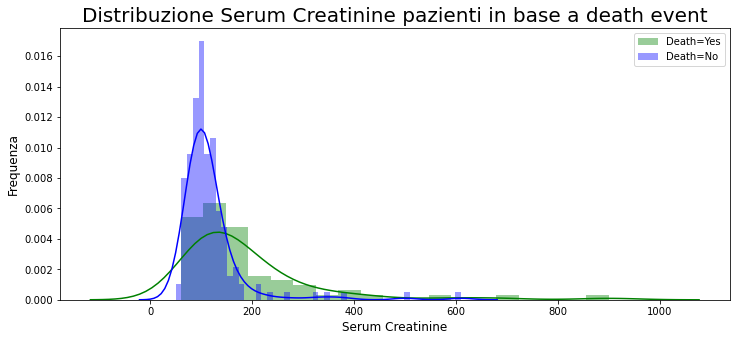

In [32]:
fig = plt.figure(figsize=(12,5))
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 1),'serum_creatinine'] , color='g', label='Death=Yes')
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 0),'serum_creatinine'] , color='b', label='Death=No')
plt.title('Distribuzione Serum Creatinine pazienti in base a death event', fontsize = 20)
plt.legend()
plt.xlabel("Serum Creatinine", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

### Serum Sodium
#### Livello di sodio nel sangue (mEq/L)

Mediamente valori più bassi sono correlati con una modesta crescita di mortalità

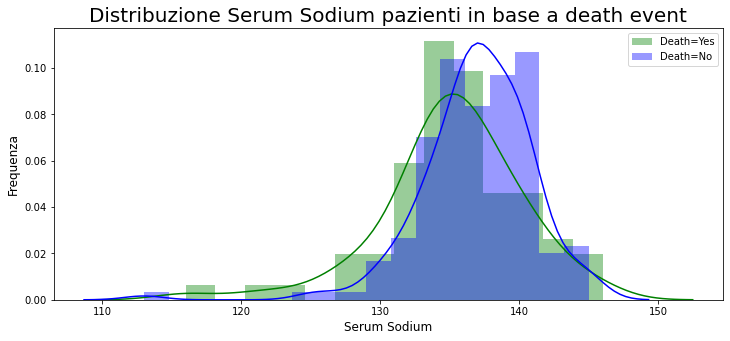

In [33]:
fig = plt.figure(figsize=(12,5))
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 1),'serum_sodium'] , color='g', label='Death=Yes')
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 0),'serum_sodium'] , color='b', label='Death=No')
plt.title('Distribuzione Serum Sodium pazienti in base a death event', fontsize = 20)
plt.legend()
plt.xlabel("Serum Sodium", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

### Time
#### Intervallo di osservazione (durata)

I pazienti che vengono osservati per un intervallo di tempo minore sono quelli che poi muoiono. Ciò dipende dal fatto che le condizioni di un paziente con abitudini poco sane è correlato a malattie cardiovascolari. I pazienti che vengono osservati per più tempo sono a rischio minore e vengono dimessi.

La feature misura per quanto un paziente è rimasto sotto osservazione, non determina il suo stato di salute (non c'è causalità). Il fatto che i pazienti muoiano con time basso è dovuto ai fattori di rischio. Questa feature potrebbe essere fuorviante e verrà droppata (in effetti i DecisionTree la prediligono in modo quasi totale).

Inoltre tale valore non è noto al momento del ricovero di un paziente (è parte del target del dataset).

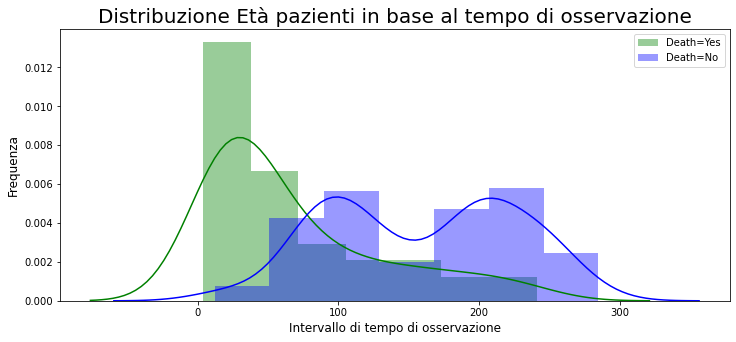

In [34]:
fig = plt.figure(figsize=(12,5))
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 1),'time'] , color='g', label='Death=Yes')
axis = sns.distplot(patients.loc[(patients['DEATH_EVENT'] == 0),'time'] , color='b', label='Death=No')
plt.title('Distribuzione Età pazienti in base al tempo di osservazione', fontsize = 20)
plt.legend()
plt.xlabel("Intervallo di tempo di osservazione", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);